### Who is this course for?

We have designed this course for a technical audience with basic coding and statistical skill sets who are not already familiar with time series analysis. Readers who struggle to code in python are advised to take an introductory python coding course before going on. Readers without some background in statistics/machine learning may find the later sections of this course more challenging, so we advise that you be at least somewhat familiar with linear regression and neural network architectures before attempting the **later sections** of this course. However, you by no means need a Masters or Ph.D. to tackle this course!

If you like this tutorial, feel free to check out my course/blog posts at [jamesmontgomery.us](http://jamesmontgomery.us).

### What is a "time series"?

A traditional machine learning dataset is a collection of observations. While these observations may be collected over time, these samples are equally weighted when training your model. Their order and relationship in time are largely ignored. To incorporate time, you may only train your model on a specific window of time, such as only the last year, to account for "concept drift" or "general trends" in the data. But this accounts for only minor temporal dynamics in your set. **Time series** datasets add an *explicit order* of observations over time. 

As an example of each kind of dataset, let us compare two hypothetical modeling problems.



###### Identity Fraud 
Some fraudsters may try to apply for a credit card using a fake identity. We can use the information from credit card applications to identify which applicants might be fraudsters. Each observation can be treated as independant from each other (this is not quite true as multiple fake identities could be generated by a single fraudster and so follow some pattern of generation). Based on the data below, it's obvious that "Frank" is the fraudster (look at his social security number!). **This is obviously not a time series problem.**

In [1]:
import pandas as pd

df_normal = pd.DataFrame.from_dict({'Name':['Frank','Herbert','Lucy'],
                                    'Social Security Number':[123456789,132985867,918276037]})
print df_normal

      Name  Social Security Number
0    Frank               123456789
1  Herbert               132985867
2     Lucy               918276037


###### Website Traffic

All websites need to be hosted on physical servers somewhere. It costs money to rent these servers, and the more servers, the more money! If we can forecast when website traffic will be high, requiring more servers, and low, requiring fewer servers, then we could only rent the number of servers we need at the moment saving costs. [Note: Ignore AWS, we want to manage our own servers!] We might try predicting website traffic volumes based on some time dependency. In the data below we can clearly see that web traffic cycles in 6 hour segments (with peaks at hours three and nine). This might let us forcast our server usage for the next few hours based on traffic in the last few hours! In this case our forecast is dependant on the order of the last few observations. 

In [2]:
df_timeseries = pd.DataFrame.from_dict({'Hour':[1,2,3,4,5,6,7,8,9,10,11,12],
                                    'Web Visitors':[100,150,300,200,100,50,120,180,250,200,130,75]})
print df_timeseries

    Hour  Web Visitors
0      1           100
1      2           150
2      3           300
3      4           200
4      5           100
5      6            50
6      7           120
7      8           180
8      9           250
9     10           200
10    11           130
11    12            75


#### Author's Note

I'll somtimes include author's notes in my tutorials. These are **optional** sections that are interesting, but are either more advanced that some readers might care to dig into or are of an opinionated anture and so not canon. 

Data with an inherent order of observations present a number of unique problems. We will discuss how to get around many of these issues throughout the course. Two great examples of problems inherent to series data are **future bleed** and **k-fold validation**. 

*Future bleed* is the situation where you are trying to predict or forecast an event in the future and accidently include data from that future in your training data. This is cheating since you would never have data from the future when you actually go to use your model. It is important that you properly clean your data so that you are not using data from future time steps to make predictions. 

*[K-fold validation](http://statweb.stanford.edu/~tibs/sta306bfiles/cvwrong.pdf)* is a technique often used to find optimal parameter values for a model, such as subset size. I will assume that the audience is already familiar with k-fold valdiation at a high level (if not, definitely read the link). Time-series (or other intrinsically ordered data) can be problematic for cross-validation because the strict ordering might break when the data is divided or "folded".

You need to break up data whose information is held within the order of the data itself. 

An approach that is sometimes more principled for time series is **forward chaining**, where your procedure would be something like this:

* fold 1 : training [1], test [2]
* fold 2 : training [1 2], test [3]
* fold 3 : training [1 2 3], test [4]
* fold 4 : training [1 2 3 4], test [5]
* fold 5 : training [1 2 3 4 5], test [6]

This more accurately models the situation you will see at prediction time: modeling on past data and predicting on forward-looking data. Do dig in more on this methodology, click [HERE](https://robjhyndman.com/hyndsight/tscv/).

You should keep these kinds of considerations in mind as we move through the course.

###### Types of time series problems

Time series modeling can be broken down into a large number of different niche areas. In fact, not all of these areas strictly involve time at all. I have broken time series analysis down into what I believe are the overarching themes of the field:

* **Time series forecasting**: Models used for prediction 
    * Example: "What will the price of an airplane ticket be in May of next year?"
    
    
* **Time series analytics**: Models used for induction/extracting insights 
    * Example: "What seasonal trends affect the price of an airplane ticket?"
    
    
* **Anomaly detection**: Models used to identify non-normal behavior
    * Example: "Based on the last few credit card transactions Frank made, is it suspicious that he just made a large purchase at a Casino?"
    
    
* **Time sensitivity**: Models that adapt over time but do not model time
    * Example: "Knowing that fraudsters adapt their behavior to defeat our models, can we build a model that automatically retrains itself as time goes on?"
    
    
* **Time as a feature**: Models that include time as a feature
    * Example: "Can we use the average time a web visitor took to fill out a field on our website to predict if they are human or a bot?"
    
    
* **Sequence techniques**: Miscelaneous problems touching on fields like natural language processing and speech analytics
    * Example: "Can we predict what word a texter will type next based on the words they ahve already typed?"

We will not be covering all of these subject areas. Sequence techniques are covered to death in courses on natural language processing and there is no need to cover them again here. I (James) may come out with a seperate course in the future on this topic specifically. We will also skip time as a feature as it is very different from other time series problems (some might argue that it is not a series problem at all!). We will not explicitly cover time series analytics, but many of the same principles for time series forecasting still apply. In fact, most intro to time series analytics courses are almost indistinguishable from introductory time series forecasting courses. 

While we don't spend time covering the differences here, it is worth noting that there are important differences between building a predictive vs inductive model (don't remember the difference between prediction and induction? [I've got you covered!](https://historiesofecology.blogspot.com/2012/12/induction-deduction-and-prediction.html)). Inductive models are often over simplified for interpretability. More experienced machine learning engineers might also note that you might also choose to remove [suppressor variables](http://documentation.statsoft.com/STATISTICAHelp.aspx?path=glossary/GlossaryTwo/S/SuppressorVariable) from an inductive model but not from a predictive model. There are whole courses built around causal modeling that explain the reasoning around including or removing supressor variables from inductive models.

We will only cover **time series forecasting, basic anaomaly detection, and some time sensitivity methodologies!** Believe me, those topics alone will be quite enough to get started on your time series journey!

For a more comprehensive overview/table of centents, see the introductory section of this course. 

As a quick reminder, we assume that those taking this course have basic familiarity with data science as a discipline. We will not cover the basic steps of the typical models build (often called the data science control cycle):

* Define the problem statment
* Explore the data
* Feature engineering
* Choose and fit a model
* Evaluate and use the model

We are here to learn about time series, and we will stick to that topic alone.

### Deconstructing a time series

###### The four basic components

We can abstract any series into systematic and non-systematic features. **Systematic features** have consistency or recurrence and can be described and modelled. **Non-systematic features** can not be modelled directly. For instance, a one-time, black-swan event such as an unexpected technical failure might impact the time series we are trying to model, but since this is an out-of-the-blue, unexpected, one-time event, we can not hope to add it directly into our model. 

All systematic features of a time series can be broken down into four basic components:

* **Level:** The average value of the series
* **Trend:** The general increasing or decreasing behavior of the series
* **Seasonality:** Repeating patterns or cycles in the series
* **Noise:** Unexplained variability

These four components are often called by other names. Some researchers will combine level and trend into one feature. Some researchers call seasonality by the name cycle. It is all just semanitics. If you grasp the core concepts these changes in jargon should not trip you up.

It is worth noting that *noise* can come from different sources. Noise could come from some naturally stochastic process contributing to the generation of the data we collect, it could come from measurement errors, or it could even come from exogenous variables.

We will refer to variables "outside" the model as exogenous variables. For example, rainfall is exogenous to the causal system constituting the process of farming and crop output. There are causal factors that determine the level of rainfall. So rainfall is endogenous to a weather model—but these factors are not themselves part of the causal model we use to explain the level of crop output. Said another way, there are no variables in our model that explain rainfall, but rainfall could be used to explain other variables in the system. (Example from Encyclopedia of Social Science Research Methods)

Acording to Daniel Little, University of Michigan-Dearborn, "a variable $x_j$ is said to be endogenous within the causal model $M$ if its value is determined or influenced by one or more of the independent variables $X$ (excluding itself)."

This will become important further into chapter one of the course.

## Try a Time Series

Now let us look at some basic time series and identify the level, trend, seasonality, and noise. Look at this first series (I know, it's super simple, bear with me) what is the level? trend? seasonality? noise?

In [3]:
# Setting up program with necessary tools and visuals

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

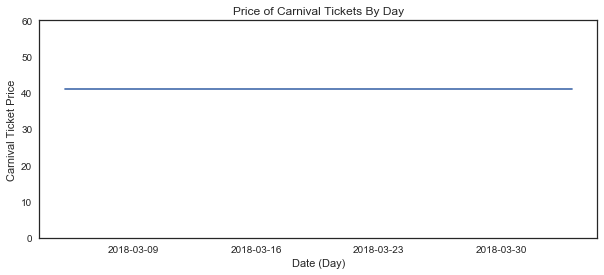

In [4]:
numdays = 30
date_list = [datetime.datetime.today() - datetime.timedelta(days=x) for x in range(0, numdays)]
ticket_prices_list = numdays*[40.95]

plt.figure(figsize=(10,4))
plt.plot(date_list, ticket_prices_list)
plt.title('Price of Carnival Tickets By Day')
plt.ylabel('Carnival Ticket Price')
plt.xlabel('Date (Day)')
plt.ylim(0,60)
plt.show()

It should be obvious that the level is $40.95. This is easy to identify as there is no trend. The series does not generally increase or decrease. We also see no patterns or cycles. This means that there is no seasonality. Finally, we see no noise (unexplained variability) in the data. In fact, there is no variability at all!

Ok, this is completely unreasonable! What carnival sets ticket prices like this? In reality, we might see the tickets increase in price. Word might get out about how great the carnival is and demand for tickets will increase over time. Let's try describing that series.  

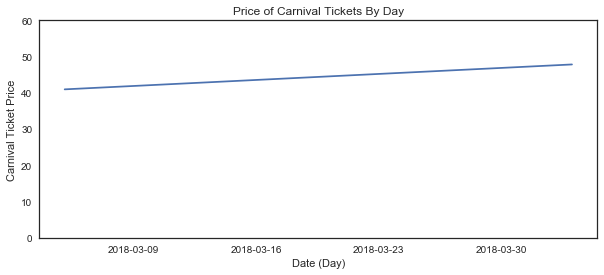

In [5]:
numdays = 30
date_list = [datetime.datetime.today() - datetime.timedelta(days=x) for x in range(0, numdays)]
ticket_prices_list = np.linspace(40.95,47.82,numdays)[::-1]

plt.figure(figsize=(10,4))
plt.plot(date_list, ticket_prices_list)
plt.title('Price of Carnival Tickets By Day')
plt.ylabel('Carnival Ticket Price')
plt.xlabel('Date (Day)')
plt.ylim(0,60)
plt.show()

In [6]:
print "level = mean = {}".format( np.mean(ticket_prices_list) )
print "trend = slope = {}".format( (ticket_prices_list[0] - ticket_prices_list[1]) / 1. )

level = mean = 44.385
trend = slope = 0.236896551724


We first start with the level of the series which is the series average: level = $44.39. We can then describe the general increase in the series over time as the slope of our line: trend = .24. We see no repeating patterns nor unexplained variability, so there is no seasonality or noise.

## Round Two, FIGHT

Ok, let's put on our big kid shorts and look at some real data. We will start with the [Airline Passengers](https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line) dataset which describes the total number of airline passengers over a period of time. The units are a count of the number of airline passengers in thousands. There are 144 monthly observations from 1949 to 1960.

Let's take a look at our data.

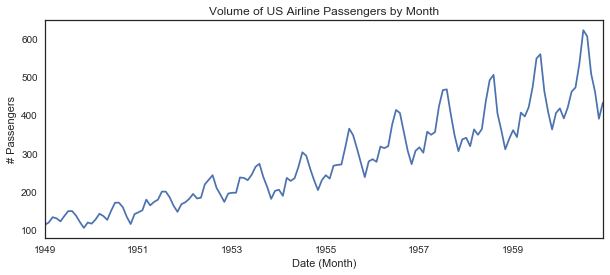

In [7]:
series = pd.Series.from_csv('./AirPassengers.csv', header=0)

plt.figure(figsize=(10,4))
series.plot()
plt.ylabel('# Passengers')
plt.xlabel('Date (Month)')
plt.title('Volume of US Airline Passengers by Month')
plt.show()

We can definitely see that there is a trend, seasonality, and some noise in this data based on the similarly shaped, repeated portions of the line! How can we get a clearer picture of each core component?

First, we need to make an assumption about how these four components combine to create the series. We typically make one of two basic assumptions here.

1) We could assume that the series is an additive combination of the four components:

$y(t)$ = Level + Trend + Seasonality + Noise

An additive model is linear where changes over time are consistently made by the same amount (think linear derivative). A linear trend is a straight line. A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

2) We could assume that the series is a multiplicative combination of the four components:

$y(t)$ = Level $*$ Trend $*$ Seasonality $*$ Noise

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time. A nonlinear trend is a curved line. A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

*So which assumption should we make for the airline data?* Well, it looks to me as if the amplitude (height) of the seasonal peaks in the data increase as time goes on. That is a good indicator of a multiplicative relationship. It is worth noting that the relationship between the components might be some mix of additive and multiplicative, but for now we will stick to the two simple assumptions above.

We will use the package `statsmodels` and function [`seasonal_decompose`](http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) to do the actual heavy lifting for our decomposition. 

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

/Users/hpf505/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


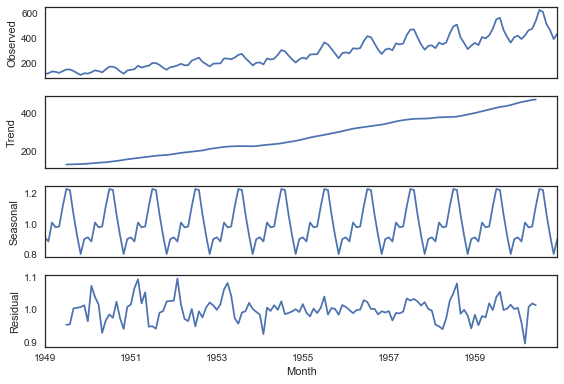

In [9]:
result = seasonal_decompose(series, model='multiplicative')
result.plot()
plt.show()

COOL! Now we have a rough estiamte of the trend, seasonality, and noise in our time series. What now? Typically we use this kind of demcomposition for **time series analysis** (induction). 

For example, we could take a close look at the seasonality to try to identify some interesting insights.

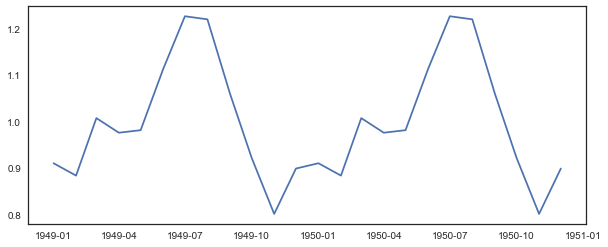

In [10]:
plt.figure(figsize=(10,4))
plt.plot(result.seasonal[:24])
plt.show()

**Observations and Theories**

From this plot, it looks like there is a very clear seasonal trend in passenger volume throughout the year. Peak travel time is July/August (vacaton season). It looks like passenger volume dips around the holidays (perhaps people want to be with their families rather than travel?). 

###### Assumptions about the four components

When we get to time series forecasting, our models will often make assumptions about the characteristics of these four components. We will almost always to answer the questions:

* Is the trend stationary?
* Is the noise homoscedastic?
* Are there discontinuities? 
* Is the seasonality only local?

Let us try to understand these questions and the assumptions they support. The first two questions have to do with *Stationarity*. A **stationary time series** is one whose statistical properties such as mean, variance, autocorrelation (we will address correlation in a bit), etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past! 

A stationary trend is where the trend (a function of time alone) is flat. There is no general decrease or increase in the series. The series might have seasonality and noise but no trend. An simple example is shown below.

**Author's Note**

Strictly speaking, a perfect sine wave is NOT stationary. It only makes sense to apply the term stationary to a series produced by a process with at least one random variable. Sine functions are deterministic and not stochastic. However, we are machine learning engineers and not statisticians, so I'll strectch the technical defninition of a stationary series a tiny bit for the sake of education/simplicity. If this really bugs you, feel free to add a random noise term or random phase to the sine function to make it 'properly' stationary.  

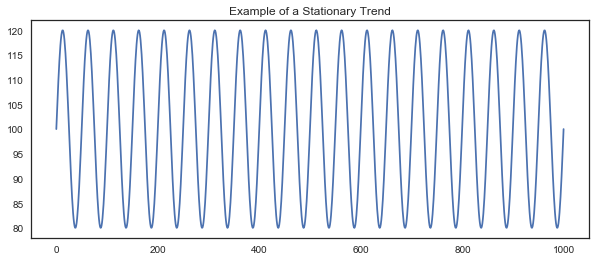

In [11]:
trend = np.sin( np.linspace(-20*np.pi, 20*np.pi, 1000) ) * 20 + 100
plt.figure(figsize=(10, 4))
plt.plot(trend)
plt.title('Example of a Stationary Trend')
plt.show()

A non-stationary trend is anything else! See the example below.

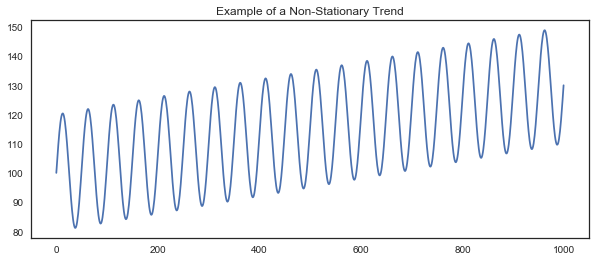

In [12]:
trend = trend + np.linspace(0, 30, 1000)
plt.figure(figsize=(10, 4))
plt.plot(trend)
plt.title('Example of a Non-Stationary Trend')
plt.show()

Non-stationary trends do not need to be linear. I've included a non-linear trend example to demonstrate this.

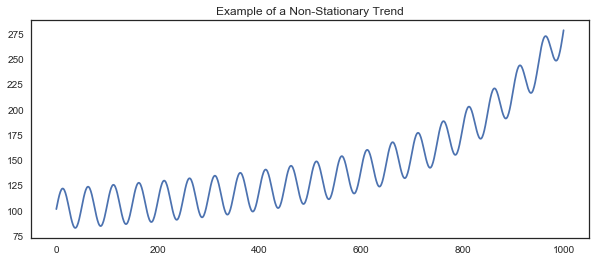

In [13]:
trend = trend + np.exp( np.linspace(0, 5, 1000) )
plt.figure(figsize=(10, 4))
plt.plot(trend)
plt.title('Example of a Non-Stationary Trend')
plt.show()

Many models assume that a series is stationary. [KK FIXME: Why?] We can apply transformations and filters on the series to make the series conditionally stationary. The most popular method for doing this is called *differencing*. You will often see series described as 'Difference Stationary' (stationary only after differencing).

**Differencing** is basically removing a series' dependance on time (aka we de-trend the series). It can also be used to remove seasonality. 

Differencing is a very simple operation, we basically create a new series based on the differences between observations in the original series:

$difference(t)$ = $observation(t)$ - $observation(t-1)$

Taking the difference between consecutive observations is called a lag-1 difference. For time series with a seasonal component, the lag may be expected to be the period (width) of the seasonality.

First Order Differencing:

$y'_t=y_t-y_{t-1}$

Second Order Differencing:

$y''_t=y'_t-y'_{t-1}=(y_t-y_{t-1})-(y_{t-1}-y_{t-2})=y_t-2y_{t-1}+y_{t-2}$

Second order differencing is the change in the changes in the original dataset (think of the relationship between distance, velocity, and acceleration). We rarely need to do second order differencing.

Temporal structure may still exist after performing a differencing operation, such as in the case of a nonlinear trend. As such, the process of differencing can be repeated more than once until all temporal dependence has been removed. The number of times that differencing is performed is called the **difference order**.

## Ready for some practice?

To practice differencing, we're going to use a dataset on shampoo sales. The original data is from Makridakis, Wheelwright, and Hyndman (1998) and can be found [here](https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line). 

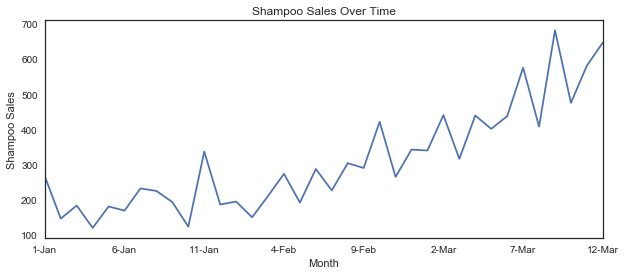

In [14]:
series = pd.read_csv('Shampoo.csv', header=0, index_col=0, squeeze=True)

plt.figure(figsize=(10,4))
plt.ylabel('Shampoo Sales')
plt.xlabel('Date (Month)')
plt.title('Shampoo Sales Over Time')
series.plot()
plt.show()

We can rather simply write our own first order differencing function. Let's try that!

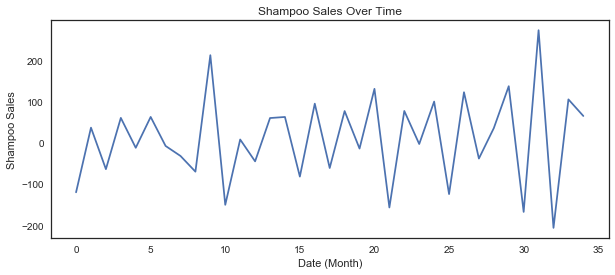

In [15]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

X = series.values
diff = difference(X)

plt.figure(figsize=(10,4))
plt.ylabel('Shampoo Sales')
plt.xlabel('Date (Month)')
plt.title('Shampoo Sales Over Time')
plt.plot(diff)
plt.show()

Cool, this no looks just like any old stationary trend! It is worth noting that `pandas` comes with a function to implicitly do differencing. I show an example of this below.

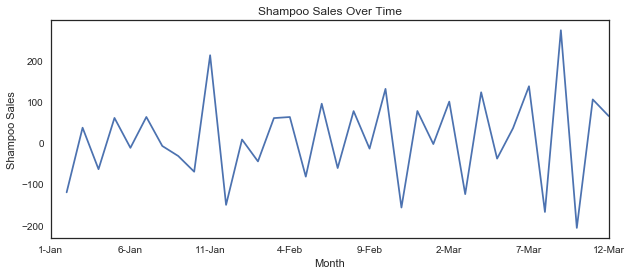

In [16]:
diff = series.diff()

plt.figure(figsize=(10,4))
plt.ylabel('Shampoo Sales')
plt.xlabel('Date (Month)')
plt.title('Shampoo Sales Over Time')
diff.plot()
plt.show()

Now remember, for a series to be stationary, all of its attributes must be stationary, not just the trend. A good example of this are heteroscedastic series. These are series where the amount of noise is not constant over time, A homoscedastic series has equal noise over time (aka the noise is stationary). An example of a heteroscedastic and homoscedastic series are shown below.

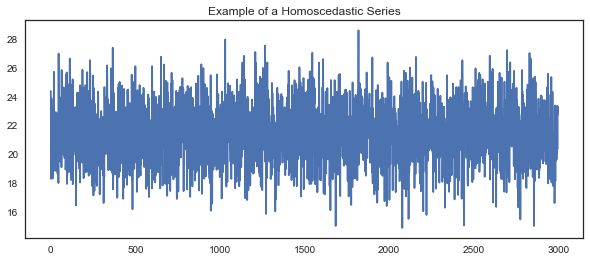

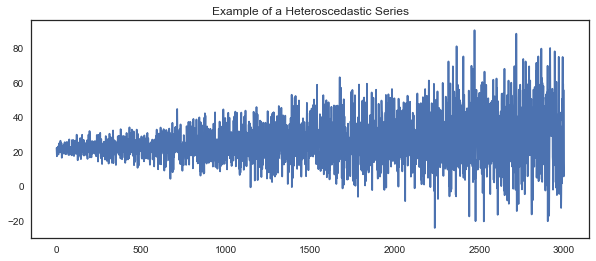

In [17]:
trend = 20.42*np.ones(3000) + np.random.normal(1,2,3000)
plt.figure(figsize=(10, 4))
plt.plot(trend)
plt.title('Example of a Homoscedastic Series')
plt.show()

trend = 20.42*np.ones(3000) + np.linspace(1,10,3000)*np.random.normal(1,2,3000)
plt.figure(figsize=(10, 4))
plt.plot(trend)
plt.title('Example of a Heteroscedastic Series')
plt.show()

Changes in variance can be hard to deal with and often throw a wrench into our models. We see in many types of customer data, for instance, that variance is proportional to signal volume. This means that the variance in our signal will increase as the amplitude of the signal increases.

We can see an example of this below where noise is proportional to signal amplitude.

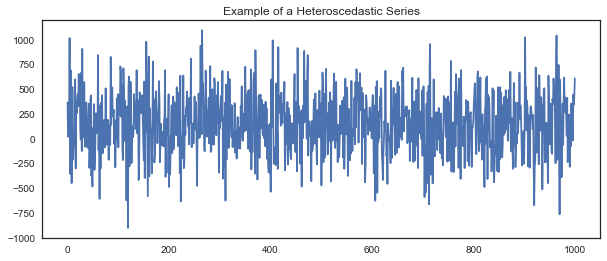

In [18]:
trend = np.sin( np.linspace(-20*np.pi, 20*np.pi, 1000) ) * 20 + 100
trend = trend + trend*np.random.normal(.5,3,1000)
plt.figure(figsize=(10, 4))
plt.plot(trend)
plt.title('Example of a Heteroscedastic Series')
plt.show()

Another nasty feature we might run across are discontinuities. How we handle a discontinuity depends entirely on what caused the discontinuity. Was there a fundamental change in the series? Is the discontinuity caused by missing data? Do we expect more discontinuities in the future? An example of a discontinuity is shown below. 

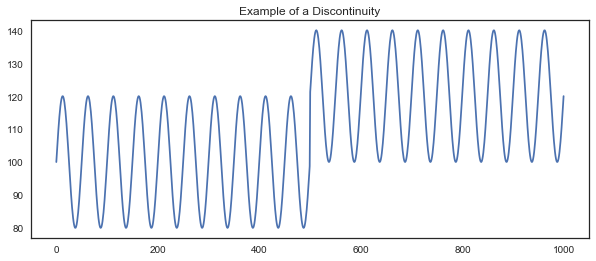

In [19]:
trend = np.sin( np.linspace(-20*np.pi, 20*np.pi, 1000) ) * 20 + 100
trend = trend + np.concatenate([np.zeros(500),20*np.ones(500)])
plt.figure(figsize=(10, 4))
plt.plot(trend)
plt.title('Example of a Discontinuity')
plt.show()

Finally, we want to know if the seasonality is 'local'? Basicaly, is there only one seasonal trend? Perhaps the series has a yearly and monthly period! An example of a series with multiple cycles/seasons is shown below. 

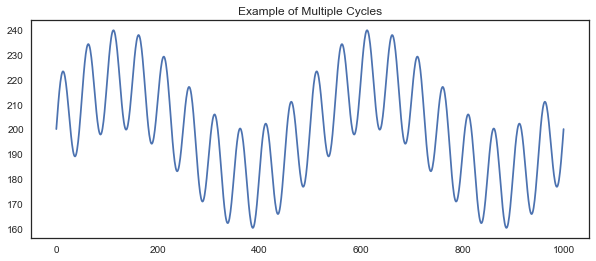

In [20]:
trend = np.sin( np.linspace(-20*np.pi, 20*np.pi, 1000) ) * 20 + 100
trend = trend + np.sin( .1*np.linspace(-20*np.pi, 20*np.pi, 1000) ) * 20 + 100
plt.figure(figsize=(10, 4))
plt.plot(trend)
plt.title('Example of Multiple Cycles')
plt.show()

How can we try to understand the cyclical patterns in our data? Well, there are a couple different ways to do this... 

## Intro to Signal Processing

We will start with the **Fourier transform**. Fourier transforms are amazing (as are their more general form, the Laplacian transform). When I did physics research in a past life, Fourier transforms were by best friend. These days I use them for a myriad of signal processing tasks such as building voice recognition models and speech to text models. So what is this magic transform?

I am not going to dive into the math behind FFT, but I encourage you to do so. Here is a good introductory [resource](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/). FFT is useful for so many signal processing tasks that it is almost a must know. It is also worth checking out [power spectral densities](https://www.youtube.com/watch?v=-Nt0FaofWL4) (PSDs). PSDs can be a [more powerful](https://dsp.stackexchange.com/questions/24780/power-spectral-density-vs-fft-bin-magnitude?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa) way of analysing signals in the frequency domain, all puns intended.

*High level explanation of Fourier Transforms*: they take signals in the time domain and convert them to the frequency domain. 

Below is a great example of this. I have convolved two signals. Each is a sine function with a different period. When we convert to the frequency domain this becomes blaringly obvious! Not only can we see two distinct periods, but we also see their values.

We are going to use the [`scipy`](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html) implementation of the Fast Fourier Transform (FFT). I will say that I usually use [`librosa`](https://github.com/librosa/librosa) for audio projects. 

In [21]:
from scipy.fftpack import fft

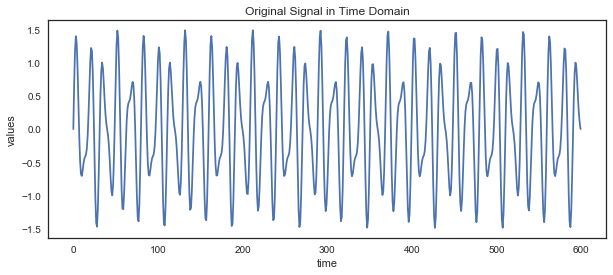

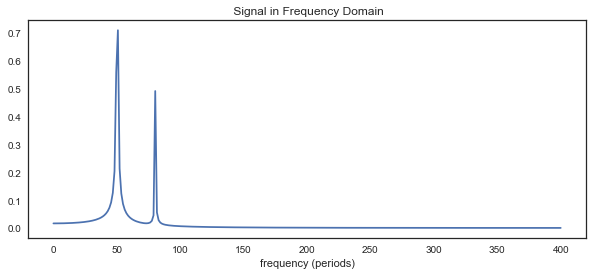

In [22]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.figure(figsize=(10, 4))
plt.title('Original Signal in Time Domain')
plt.ylabel('values')
plt.xlabel('time')
plt.plot(y)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title(' Signal in Frequency Domain')
plt.xlabel('frequency (periods)')
plt.show()

The periodogram presents the two sine functions clearly. This is the [FFT of the output of the autocorrelation function](https://www.mathworks.com/matlabcentral/answers/56001-difference-b-w-periodogram-and-square-of-ft-of-signal-method-to-calculate-the-psd). We will address autocorrelation in a bit. For now, just think of the periodogram as calculating the significance of different frequencies in time-series data to identify any intrinsic periodic signals. A periodogram is similar to the Fourier Transform, but is optimized for unevenly time-sampled data, and for different shapes in periodic signals. To understand more about FFT, Periodograms, and PSD, try reading through this [article](https://lectures.quantecon.org/py/estspec.html).

For now, FFT is good enough for us. 

## Autocorrelation

Our last stop deconstructing time series will be a bit of information theory. Hang in there, as soon as we are done here we can get to the modeling!

Now presumably the data points in the series you are interested in relate to each other with respect to time. More often than not the neighboring points in a time series are more similar to each other than points in the distant past (although that is not always the case). 

We can think about high [correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence) between points like this: If two points are highly correlated, then information about one point provides some information about the other point. The higher the correlation, the more information. Remember, *high correlation does not mean causation*. If you see correlation between points try to understand what real-world relationship might produce such correlation. Try to consider any confounding variables, randomness in the set, and/or [suppressor variables](http://documentation.statsoft.com/STATISTICAHelp.aspx?path=glossary/GlossaryTwo/S/SuppressorVariable) at play.

The measure of how points correlate to each other within a series is called *autocorrelation*. **Autocorrelation** is correlation measured between the time series and itself lagged by an amount of time. It is a special case of cross correlation where you are comparing a series to itself rather than comparing two independant series.

$$
AutoCorr = \frac{E[(X_{t} - \mu_{t})(X_{t-n} - \mu_{t-n})]}{\sigma_{t}\sigma_{t-n}}
$$ 

**where:** <br/>
$\mu$ = mean <br/>
$\sigma = $ variance <br/>
$E(X)$ = expected value of X <br/>
$X_{t}$ = value at time step t <br/>
$X_{t-n}$ = value at time step (t - n) where n is the "lag" 

NOTE: Autocorrelation is a special case of cross correlation and so suffers (as should be apparent from the above equation) from the [assumption that there is a linear relationship](https://stats.stackexchange.com/questions/23308/cross-correlation-vs-mutual-information?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa) between the series being considered. If we feel that this is a [poor assumption](https://stats.stackexchange.com/questions/81659/mutual-information-versus-correlation?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa), we can look at the [mutual information](https://www.pks.mpg.de/~tisean/Tisean_3.0.1/docs/chaospaper/node8.html) within the series

Let's compute autocorrelation within the airline data using `statsmodels`. Compare a lag of 0 (comparing an observation with itself) with a lag of 1 (comparing adjacent observations). What do you see?

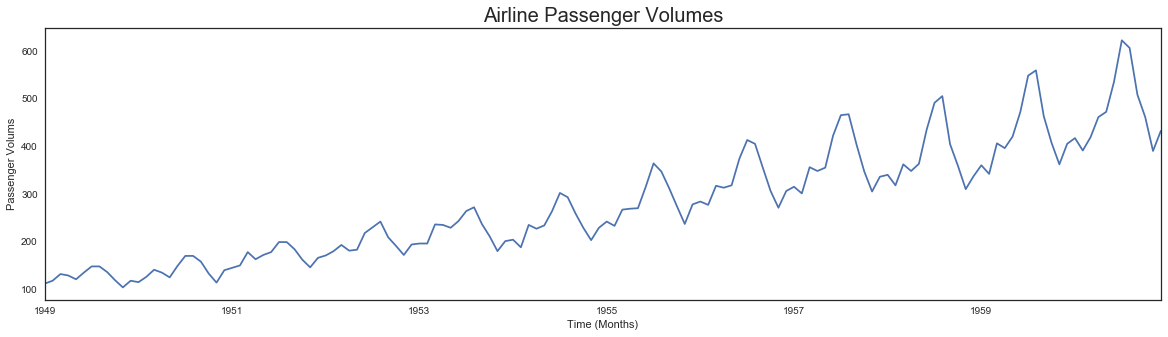

Autocorrelation at lag 0: 1.0
Autocorrelation at lag 1: 0.948047340752
Autocorrelation at lag 2: 0.875574835125
Autocorrelation at lag 3: 0.806681155497
Autocorrelation at lag 4: 0.752625417388
Autocorrelation at lag 5: 0.713769972652
Autocorrelation at lag 6: 0.681733603331
Autocorrelation at lag 7: 0.662904386368


In [23]:
from statsmodels.tsa.stattools import acf

series = pd.Series.from_csv('./AirPassengers.csv', header=0)

# plot
plt.figure(figsize=(20,5))
series.plot()
plt.ylabel("Passenger Volums")
plt.xlabel("Time (Months)")
plt.title("Airline Passenger Volumes", fontsize=20)
plt.show()

# ACF with lags 1,2,3,4
acf_7 = acf(series, nlags=7)

for i, val in enumerate(acf_7):
    print('Autocorrelation at lag {}: {}'.format(i, val)) 

Let's try calculating the autocorrelation within the airline dataset over a wide range of lags. We can plot autocorrelation by lag to make the information more easily digestible. We call this an autocorrelation plot. This plot gives us information about the relationship between observations in the data set and observations n steps in the past (n representing the lag). Can you tease out a seasonal trend in our call center data?

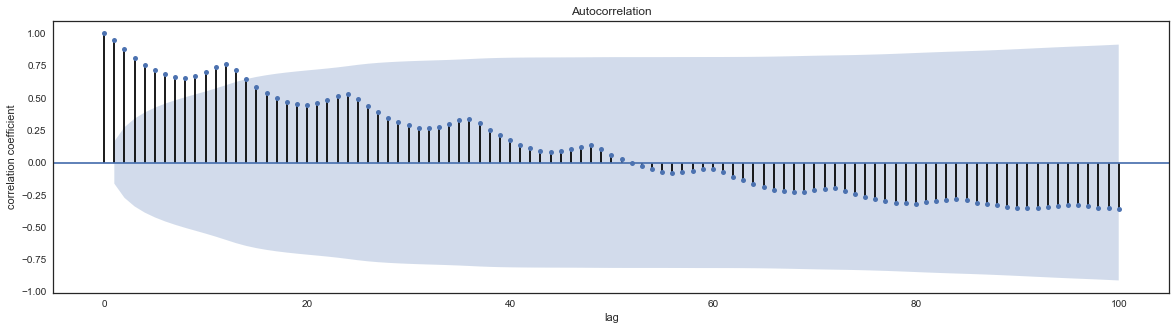

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

# ACF plot
fig, ax = plt.subplots(figsize=(20,5))
plt.xlabel('lag')
plt.ylabel('correlation coefficient')
_ = plot_acf(series, lags=100,  ax=ax)
plt.show()

Ok, so how do we read this? Each bar represents the magnitude of the correlation of points seperated by the lag on the x axis. We notice that points at zero lag are exactly correlated...because we are comparing a point to itself! We then notice that the auto-correlation of points at different lags takes on a cyclical pattern. It looks like points at lag 12 are very correlated, this is a good indicator of a seasonal pattern in our data with a period of 12. What's with the greyish-blueish filled in area? That represents the 95% confidence bounds of the ACF function. Some individuals choose to only consider points outside of this area as 'significant'. I choose to consider the entire plot and just layer on my common sense and modeling intuition. 

###### Partial Autocorrelation

The partial autocorrelation function can be another powerful tool in exploratory analysis of time series. To underststand partial autocorrelation we must first understand partial correlation. 

Consider an example where you are creating a simple linear regression model. You are predicting $y$ with three independent variables $x_{1}$, $x_{2}$, and $x_{3}$. The partial correlation between $y$ and $x_{3}$ is the amount of correlation between $y$ and $x_{3}$ that is not explained by their common correlations with $x_{1}$ and $x_{2}$. Said another way, partial correlation between two variables is the amount of correlation between them which is not explained by their mutual correlations with a specified set of other variables. 

Partial **autocorrelation** is the amount of correlation between a variable and a lag of itself that is not explained by correlations at all lower-order-lags. The autocorrelation of a time series $y$ at lag 1 is the correlation between $y_{t}$ and $y_{t-1}$. Now consider if we were finding the autocorrelation between $y_{t}$ and $y_{t-2}$. In the same way $y_{t}$ is correlated with $y_{t-1}$, then $y_{t-1}$ is also correlated with $y_{t-2}$. 

Therefore, when we are measuring lag 2 autocorrelation between $y_{t}$ and $y_{t-2}$ we are also including the effects of lag 1 autocorrelation betweeb $y_{t}$ and $y_{t-1}$. In short, autocorrelation propogates. The partial autocorrelation function can isolate the autocorrelation between $y_{t}$ and $y_{t-2}$, or any other lag order (i.e. $y_{t}$ and $y_{t-n}$).

Let's calculate the autocorrelation plot of the airline dataset. How does it differ from the autocorrelation plot? How does this affect your initial intuition about seasonality in call center call volumes?

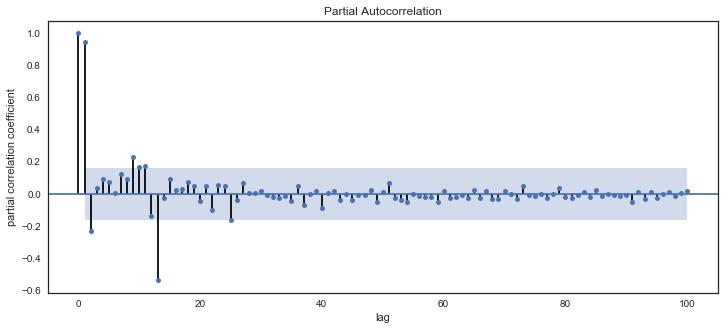

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf

# PACF plot
fig, ax = plt.subplots(figsize=(12,5))
plt.xlabel('lag')
plt.ylabel('partial correlation coefficient')
_ = plot_pacf(series, lags=100,  ax=ax)
plt.show()

We read this in the same way as the ACF (auto-correlation) plot, but this time we plot aprtial auto-correlation. Notice how much the plot has changed? Now we see that the point with the most predictive power about a following point is at lag one. 

We have just covered a lot of jargon. As we move on through the course, we will build on the base concepts covered here. I encourage you to take a second and read back through this lesson to ensure that you are comfortable with the terms, definitions, and material. 